# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [1]:
import pandas as pd
import numpy as np


In [2]:
# Read the dataset from the source and assign it to the data. 

data=pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv")

In [3]:
data.head()  #To know what is my data?!

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [4]:
data.columns     # I wanted to have a few changes to my features -to see the columns at a glance

Index(['Customer', 'ST', 'GENDER', 'Education', 'Customer Lifetime Value',
       'Income', 'Monthly Premium Auto', 'Number of Open Complaints',
       'Policy Type', 'Vehicle Class', 'Total Claim Amount'],
      dtype='object')

In [5]:
#changes are : 1.Column names should be in lower case
#2.White spaces in column names should be replaced by _3.st could be replaced for state
data.columns=data.columns.str.lower().str.replace(" ","_")
data=data.rename(columns={"st":"state"})
data.columns 

Index(['customer', 'state', 'gender', 'education', 'customer_lifetime_value',
       'income', 'monthly_premium_auto', 'number_of_open_complaints',
       'policy_type', 'vehicle_class', 'total_claim_amount'],
      dtype='object')

## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [6]:
#I wanted to know the valuses of the gender
data['gender'].value_counts(dropna=False)

gender
NaN       3054
F          457
M          413
Male        39
female      28
Femal       17
Name: count, dtype: int64

In [7]:
#I chose F to fill NANs because it is the mode.
data['gender']= data['gender'].fillna('F')

In [8]:
def clean(x):   #standardized
    if x in ['M','Male']:
        return 'M'
    elif x in ['F','Femal', 'female']:
        return 'F'
    else:
        return np.nan
    

data['gender'] = data['gender'].apply(clean)
data
data['gender'].value_counts()

gender
F    3556
M     452
Name: count, dtype: int64

In [9]:
def clean(x):  #standardized
    if x in ['WA','Washington']:
        return 'Washington'
    elif x in ['AZ', 'Arizona']:
        return 'Arizona'
    elif x in ['Nevada']:
        return 'Nevada'
    elif x in ['California', 'Cali']:
        return 'California'
    elif x in ['Oregon']:
        return 'Oregon'
    else:
        return np.nan
    

data['state'] = list(map(clean, data['state']))
data


,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,F,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data['state'].value_counts(dropna=False)

state
NaN           2937
California     331
Oregon         320
Arizona        211
Washington     111
Nevada          98
Name: count, dtype: int64

In [11]:
data['education']=data['education'].replace({'Bachelors':'Bachelor'})   # #standardized
data.education.value_counts()

education
Bachelor                331
College                 313
High School or Below    296
Master                   94
Doctor                   37
Name: count, dtype: int64

In [12]:
data['customer_lifetime_value']=data['customer_lifetime_value'].str.replace('%','')
data['customer_lifetime_value']=pd.to_numeric(data['customer_lifetime_value'], errors='coerce')/100
data['customer_lifetime_value']

0              NaN
1        6979.5359
2       12887.4317
3        7645.8618
4        5363.0765
           ...    
4003           NaN
4004           NaN
4005           NaN
4006           NaN
4007           NaN
Name: customer_lifetime_value, Length: 4008, dtype: float64

In [13]:
car_list = ['Sports Car', 'Luxury SUV', 'Luxury Car']    # #standardized

data.vehicle_class = np.where(data.vehicle_class.isin(car_list),'Luxury',data.vehicle_class)   

In [14]:
data.vehicle_class.value_counts()

vehicle_class
Four-Door Car    576
Two-Door Car     205
SUV              199
Luxury            91
Name: count, dtype: int64

## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [15]:
# understandind data type:
data.dtypes 

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

In [16]:
# spilting
data['number_of_open_complaints'] = data['number_of_open_complaints'].str.split('/').str[1]
data['number_of_open_complaints']

0         0
1         0
2         0
3         0
4         0
       ... 
4003    NaN
4004    NaN
4005    NaN
4006    NaN
4007    NaN
Name: number_of_open_complaints, Length: 4008, dtype: object

In [17]:
#change the 'number_of_open_complaints' to (int)
#data['number_of_open_complaints'] = data['number_of_open_complaints'].replace({np.nan : "0"})  #we can not change string to int so we should first convert to number and then int
#data['number_of_open_complaints'] = data['number_of_open_complaints'].astype(int)
#'number_of_open_complaints' is numerical variable but we should treat as categorical

## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers using `applymap()`.

In [18]:
data.isna().sum()   #to understand the sum of the null value

customer                     2937
state                        2937
gender                          0
education                    2937
customer_lifetime_value      2940
income                       2937
monthly_premium_auto         2937
number_of_open_complaints    2937
policy_type                  2937
vehicle_class                2937
total_claim_amount           2937
dtype: int64

In [19]:
mean=data['customer_lifetime_value'].mean()  # I wanted to replace it with the mean value, so first, calculate the mean.
mean

7936.902593445692

In [20]:
data['customer_lifetime_value'] = data['customer_lifetime_value'].fillna(mean)
data['customer_lifetime_value']

0        7936.902593
1        6979.535900
2       12887.431700
3        7645.861800
4        5363.076500
            ...     
4003     7936.902593
4004     7936.902593
4005     7936.902593
4006     7936.902593
4007     7936.902593
Name: customer_lifetime_value, Length: 4008, dtype: float64

In [21]:
data['customer_lifetime_value'] = data['customer_lifetime_value'].round(decimals = 2)  #now it is nice!
data['customer_lifetime_value']


0        7936.90
1        6979.54
2       12887.43
3        7645.86
4        5363.08
          ...   
4003     7936.90
4004     7936.90
4005     7936.90
4006     7936.90
4007     7936.90
Name: customer_lifetime_value, Length: 4008, dtype: float64

## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [22]:
# Your code here

# Check for duplicated rows, and Output is not duplicate rows.

data = data.drop_duplicates()
data
    

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,F,Master,7936.90,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,6979.54,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.43,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7645.86,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.08,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
1067,VJ51327,California,F,High School or Below,20315.00,63209.0,102.0,2,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,3239.12,16061.0,88.0,0,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,4626.80,79487.0,114.0,0,Special Auto,SUV,547.200000
1070,MY31220,California,F,College,8997.04,54230.0,112.0,0,Personal Auto,Two-Door Car,537.600000


In [23]:
data = data.drop(1071, axis = 0)
data         


,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,F,Master,7936.90,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,6979.54,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.43,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7645.86,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.08,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,3059.55,38644.0,78.0,1,Personal Auto,Four-Door Car,361.455219
1067,VJ51327,California,F,High School or Below,20315.00,63209.0,102.0,2,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,3239.12,16061.0,88.0,0,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,4626.80,79487.0,114.0,0,Special Auto,SUV,547.200000


In [24]:
data = data.reset_index(drop=True)
data

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,F,Master,7936.90,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,6979.54,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.43,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7645.86,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.08,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,3059.55,38644.0,78.0,1,Personal Auto,Four-Door Car,361.455219
1067,VJ51327,California,F,High School or Below,20315.00,63209.0,102.0,2,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,3239.12,16061.0,88.0,0,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,4626.80,79487.0,114.0,0,Special Auto,SUV,547.200000


# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [25]:
# Your code here
data2 = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv')

In [26]:
def clean_df(df):
    n_cols = []
    for i in range(len(df.columns)):
        n_cols.append(df.columns[i].lower().replace(' ', '_'))
    df.columns = n_cols
    df = df.rename(columns={'st':'state'})
    df = df.drop_duplicates()
    df = df.drop(1071, axis = 0)
    df['gender']= df['gender'].fillna('F')
    df['gender']=np.where(df['gender'].isin(['F', 'female', 'Femal']),'F','M')
    df['customer_lifetime_value']=df['customer_lifetime_value'].str.replace('%','').astype(float)/100
    new_list = []
    for item in df['number_of_open_complaints']:
        new_list.append(item.split('/')[1])
    df['number_of_open_complaints']=new_list
    df['number_of_open_complaints']=pd.to_numeric(df['number_of_open_complaints'], errors = 'coerce')
    df['customer_lifetime_value']=pd.to_numeric(df['customer_lifetime_value'], errors='coerce')
    df['customer_lifetime_value'] = df['customer_lifetime_value'].fillna(df['customer_lifetime_value'].mean()).round(decimals = 2)
    
    return df

In [27]:
data2 = clean_df(data2)
data2

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,F,Master,7936.90,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,6979.54,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.43,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7645.86,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.08,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,3059.55,38644.0,78.0,1,Personal Auto,Four-Door Car,361.455219
1067,VJ51327,Cali,F,High School or Below,20315.00,63209.0,102.0,2,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,3239.12,16061.0,88.0,0,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,4626.80,79487.0,114.0,0,Special Auto,SUV,547.200000


# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

In [28]:
# Your code here
data2[['total_claim_amount','customer_lifetime_value']].describe(include = 'all')   #I have not compeleted  this part yet.

,total_claim_amount,customer_lifetime_value
count,1071.000000,1071.000000
mean,404.986909,7936.902521
std,293.027260,6425.757110
min,0.382107,2004.350000
25%,202.157702,4048.535000
50%,354.729129,5887.180000
75%,532.800000,8945.210000
max,2893.239678,58166.550000


# Round 3

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   1071 non-null   object 
 1   state                      1071 non-null   object 
 2   gender                     1071 non-null   object 
 3   education                  1071 non-null   object 
 4   customer_lifetime_value    1071 non-null   float64
 5   income                     1071 non-null   float64
 6   monthly_premium_auto       1071 non-null   float64
 7   number_of_open_complaints  1071 non-null   object 
 8   policy_type                1071 non-null   object 
 9   vehicle_class              1071 non-null   object 
 10  total_claim_amount         1071 non-null   float64
dtypes: float64(4), object(7)
memory usage: 92.2+ KB


In [31]:
data.describe()   #get inside to our data

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
count,1071.000000,1071.000000,1071.000000,1071.000000
mean,7936.902521,39295.701214,193.234360,404.986909
std,6425.757110,30469.427060,1601.190369,293.027260
min,2004.350000,0.000000,61.000000,0.382107
25%,4048.535000,14072.000000,68.000000,202.157702
50%,5887.180000,36234.000000,83.000000,354.729129
75%,8945.210000,64631.000000,109.500000,532.800000
max,58166.550000,99960.000000,35354.000000,2893.239678


<Axes: xlabel='gender', ylabel='count'>

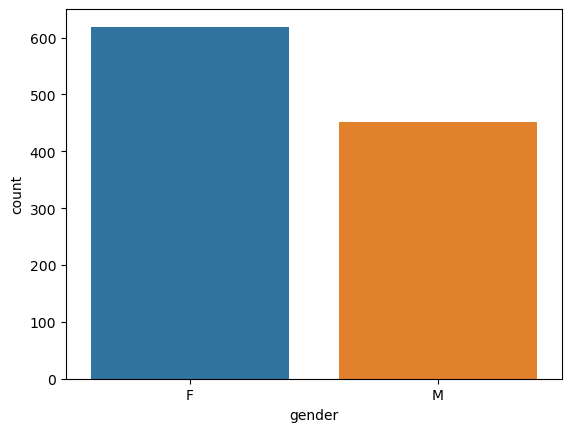

In [32]:
#Show a plot of the Gender breakdown.
sns.countplot(x='gender', data=data)     #As shown, There are more female than male

<Axes: xlabel='state', ylabel='income'>

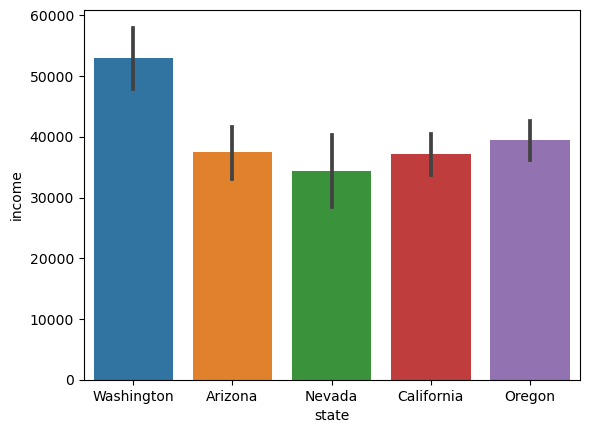

In [33]:
#Show a plot of Income by State.
sns.barplot(y='income', x='state', data=data)   #Washington has a lot of people making a good amount of money, while in California and Arizona, incomes are spread out more evenly.

<Axes: xlabel='policy_type', ylabel='total_claim_amount'>

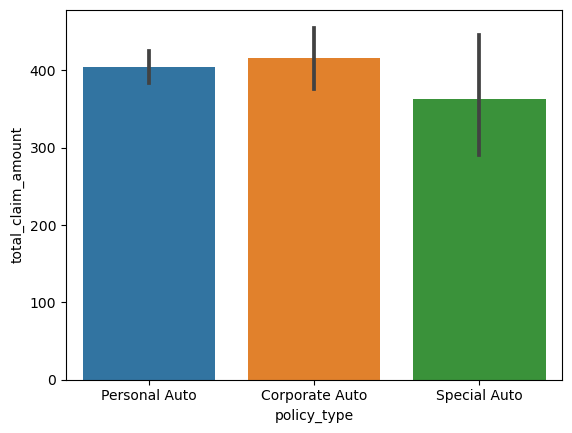

In [34]:
#Show a plot of the Policy Type by the Total Claim Amount.
sns.barplot(x='policy_type', y='total_claim_amount', data=data)

[None, None, None, None, None, None, None, None, None, None]

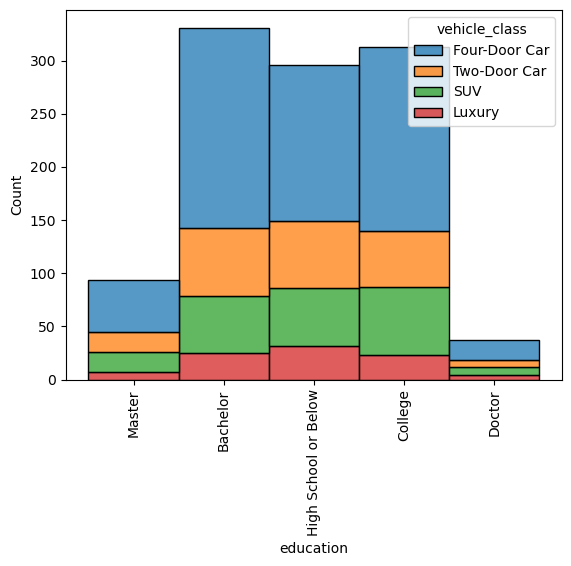

In [35]:
#Show a plot of the Education by Vehicle Class.
g = sns.histplot(x="education", hue="vehicle_class", data=data, stat="count", multiple="stack")
plt.setp(g.get_xticklabels(), rotation=90)

#The data shows that most individuals with bachelor's degrees tend to own four-door cars, whereas those with master's degrees are less likely to own a vehicle. Surprisingly, people with high school degrees appear to have a higher preference for luxury vehicles.

# Round 4

In [36]:
data.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

In [37]:
categorical = data.select_dtypes(include=object)
numerical = data.select_dtypes(include=np.number)

C:\Users\Parinaz\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


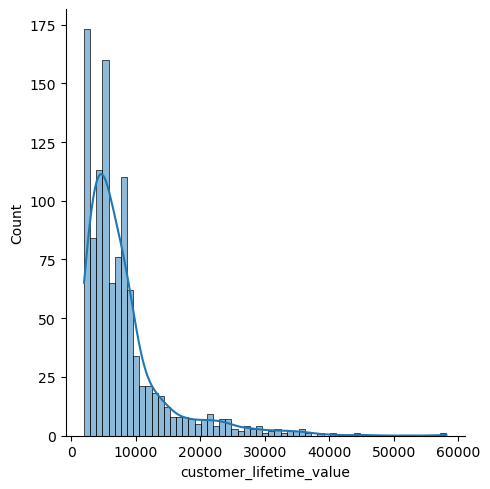

C:\Users\Parinaz\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


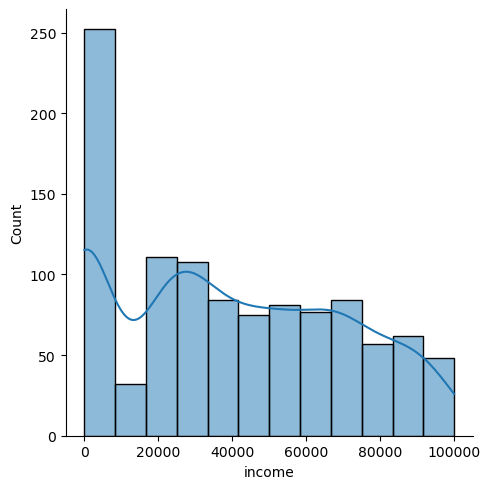

C:\Users\Parinaz\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


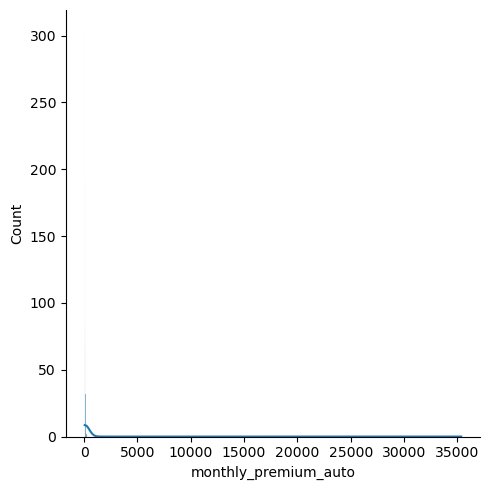

C:\Users\Parinaz\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


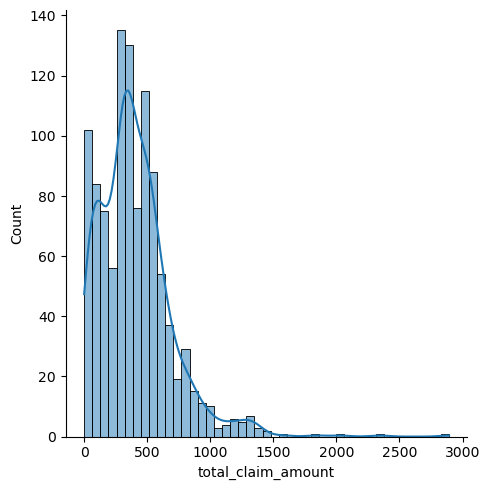

In [38]:
#Use seaborn library to construct distribution plots for the numerical variables #I plot one by one; I learnt creative ways!:)
for column in numerical.columns:
    sns.displot(numerical[column],kde=True)
    plt.show()

<Axes: xlabel='monthly_premium_auto', ylabel='count'>

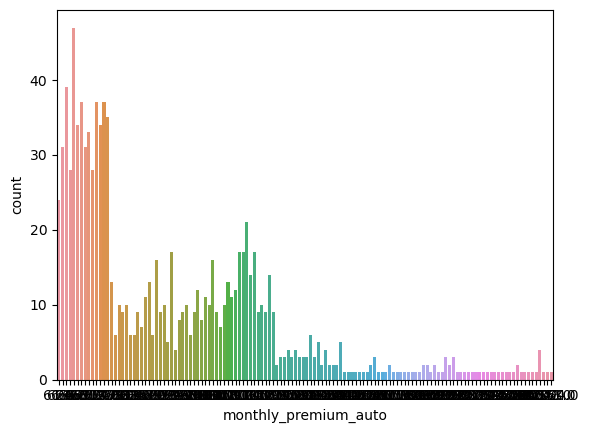

In [39]:
sns.countplot(data= numerical,x='monthly_premium_auto')

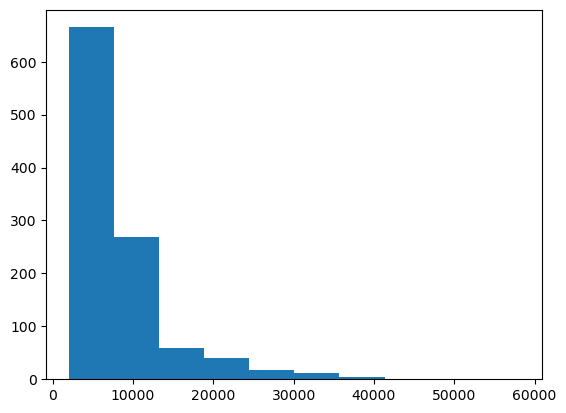

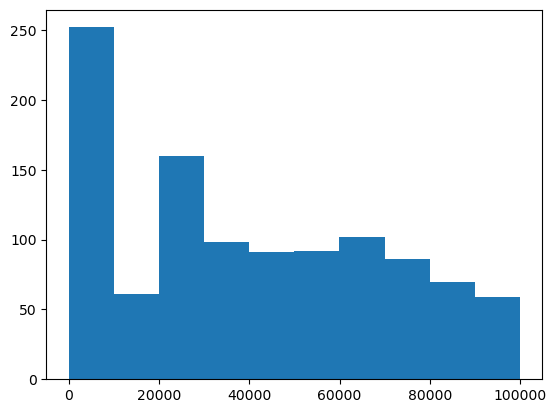

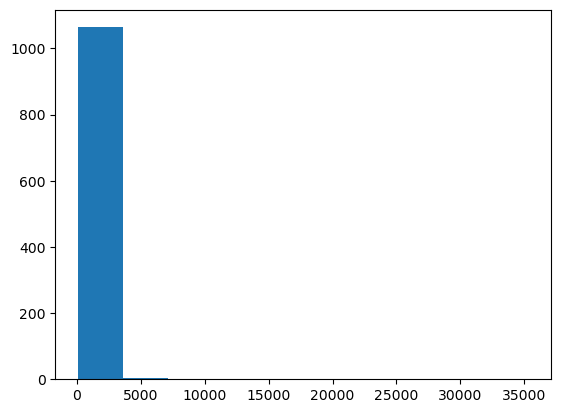

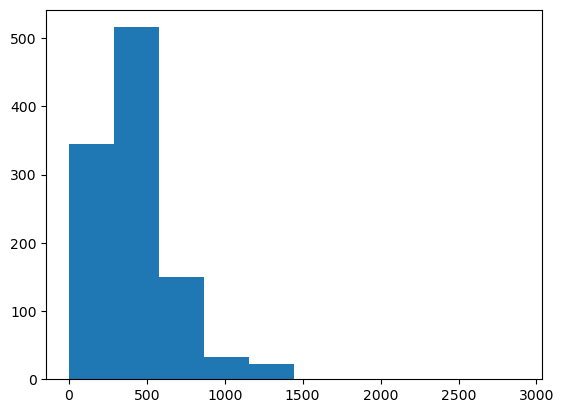

In [40]:
#Use Matplotlib to construct histograms
fig, ax = plt.subplots()
for column in numerical.columns:
    plt.hist(numerical[column])
    plt.show()

In [41]:
correlations = numerical.corr()
correlations

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
customer_lifetime_value,1.000000,0.041610,0.005027,0.131452
income,0.041610,1.000000,0.049100,-0.361282
monthly_premium_auto,0.005027,0.049100,1.000000,-0.040493
total_claim_amount,0.131452,-0.361282,-0.040493,1.000000


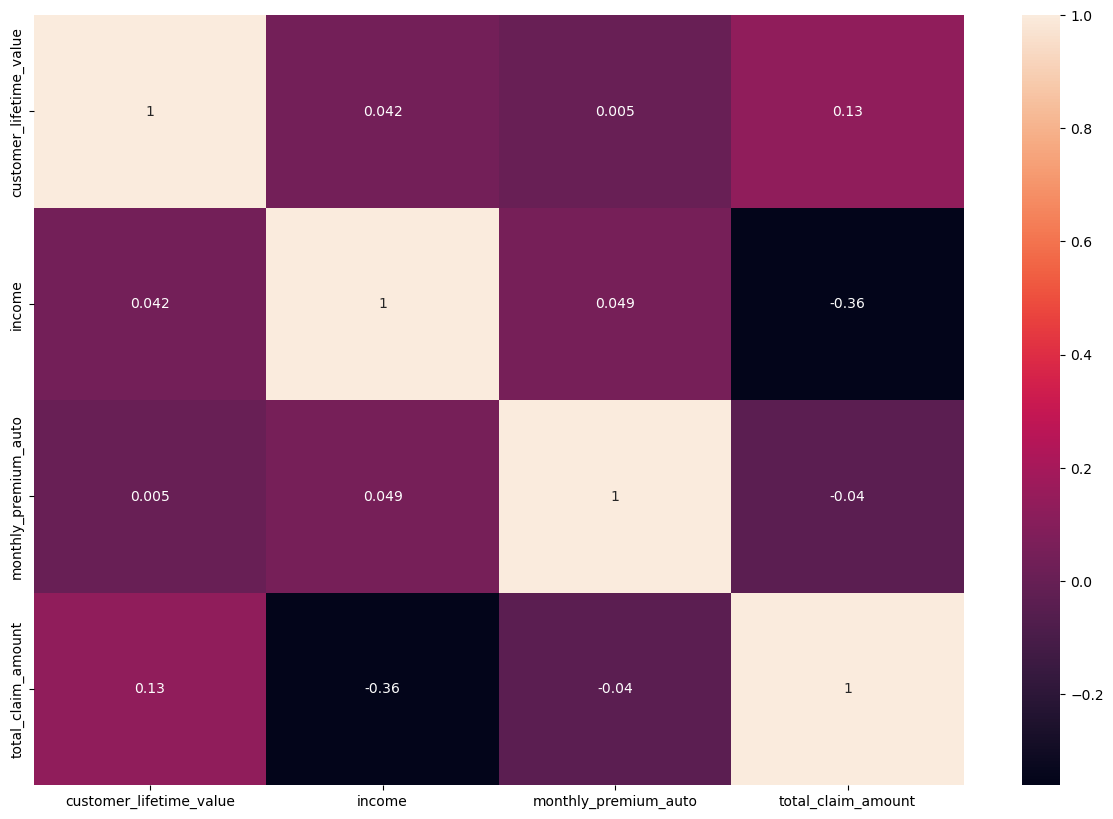

In [42]:
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(numerical.corr(), annot=True)
plt.show()   # there is no Mulicoliniarity

# Round 5

In [43]:
#Processing for the X y split
X=data.drop('total_claim_amount', axis=1)     
y=data['total_claim_amount']

In [44]:
#We do not need the customer columns as it dose not provide any insights.
 
X=X.drop(columns=['customer'],axis=1)

In [45]:
#separating numerical and categorical
X_num = X.select_dtypes(np.number)
X_cat = X.select_dtypes(object)

In [46]:
X_cat.shape

(1071, 6)

In [47]:
X_num.shape

(1071, 3)

In [48]:
X_cat.describe()

,state,gender,education,number_of_open_complaints,policy_type,vehicle_class
count,1071,1071,1071,1071,1071,1071
unique,5,2,5,6,3,4
top,California,F,Bachelor,0,Personal Auto,Four-Door Car
freq,331,619,331,830,780,576


In [49]:
#take a look at numerical data
X_num.describe()

,customer_lifetime_value,income,monthly_premium_auto
count,1071.000000,1071.000000,1071.000000
mean,7936.902521,39295.701214,193.234360
std,6425.757110,30469.427060,1601.190369
min,2004.350000,0.000000,61.000000
25%,4048.535000,14072.000000,68.000000
50%,5887.180000,36234.000000,83.000000
75%,8945.210000,64631.000000,109.500000
max,58166.550000,99960.000000,35354.000000


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [51]:
transformer = MinMaxScaler().fit(X_num)    #Scaling
X_norm = transformer.transform(X_num)
print(X_norm.shape)
X_num_scale = pd.DataFrame(X_norm, columns=X_num.columns)
X_num_scale.head()

(1071, 3)


,customer_lifetime_value,income,monthly_premium_auto
0,0.105632,0.000000,0.026606
1,0.088586,0.000000,0.000935
2,0.193779,0.487865,0.001332
3,0.100450,0.000000,0.001275
4,0.059804,0.363715,0.000198


# Round 6

In [52]:
from sklearn.preprocessing import OneHotEncoder

In [53]:
encoder = OneHotEncoder(drop='first').fit(X_cat)

cols = encoder.get_feature_names_out(input_features=X_cat.columns)

X_cat_encode = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols)

X_cat_encode.head()   #I do not know why my columns are extended!!I tried several times

,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,education_College,education_Doctor,education_High School or Below,education_Master,number_of_open_complaints_1,number_of_open_complaints_2,number_of_open_complaints_3,number_of_open_complaints_4,number_of_open_complaints_5,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [54]:
X=pd.concat([X_num_scale, X_cat_encode], axis=1)  #concat numerical and categorical transformations
X.describe()

,customer_lifetime_value,income,monthly_premium_auto,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,education_College,education_Doctor,...,number_of_open_complaints_1,number_of_open_complaints_2,number_of_open_complaints_3,number_of_open_complaints_4,number_of_open_complaints_5,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
count,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,...,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
mean,0.105632,0.393114,0.003747,0.309057,0.091503,0.298786,0.103641,0.422035,0.292250,0.034547,...,0.128852,0.046685,0.031746,0.012138,0.005602,0.728291,0.053221,0.084967,0.185808,0.191410
std,0.114414,0.304816,0.045368,0.462321,0.288458,0.457940,0.304937,0.494115,0.455009,0.182715,...,0.335192,0.211063,0.175405,0.109554,0.074673,0.445048,0.224579,0.278963,0.389133,0.393595
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.036398,0.140776,0.000198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.069136,0.362485,0.000623,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.123586,0.646569,0.001374,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
#Train Test Split
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test=tts(X, y, test_size=.2)

In [56]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,education_College,education_Doctor,...,number_of_open_complaints_1,number_of_open_complaints_2,number_of_open_complaints_3,number_of_open_complaints_4,number_of_open_complaints_5,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
657,0.009085,0.438776,0.000113,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
365,0.021556,0.540056,0.000538,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
544,0.044944,0.703681,0.001473,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
840,0.103910,0.584374,0.004222,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
869,0.281006,0.998299,0.181424,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,0.048847,0.421819,0.001757,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
285,0.076912,0.785634,0.000482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
83,0.009236,0.430892,0.000057,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
116,0.049296,0.210014,0.002040,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [57]:
y_train

657     156.124914
365     421.484456
544     542.400000
840    1008.000000
869     178.986788
          ...     
852     799.673766
285     374.400000
83      302.400000
116     638.400000
453      25.299000
Name: total_claim_amount, Length: 856, dtype: float64

In [58]:
from sklearn.linear_model import LinearRegression as linreg   #Train and run model

lm = linreg()    # model
lm.fit(X_train, y_train)   # model training
y_pred = lm.predict(X_test)   # model prediction

In [59]:
#train_r2 = lm.score(X_train, y_train)
#test_r2 = lm.score(X_test, y_test)
#print(f"Training R^2: {train_r2} -- Testing R^2: {test_r2}")
print ('train R2: {} -- test R2: {}'.format(lm.score(X_train, y_train),
                                            lm.score(X_test, y_test)))

train R2: 0.37826518827754396 -- test R2: 0.3568473602137684


In [60]:
from sklearn.metrics import mean_squared_error as mse


train_mse=mse(lm.predict(X_train), y_train)
test_mse=mse(y_pred, y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 54658.48400710263 -- test MSE: 49722.11562185948


In [61]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 233.7915396397026 -- test RMSE: 222.98456364031003


In [62]:
from sklearn.metrics import mean_absolute_error as mae

train_mae=mae(lm.predict(X_train), y_train)
test_mae=mae(y_pred, y_test)

print ('train MAE: {} -- test MAE: {}'.format(train_mae, test_mae))

train MAE: 167.73113837355845 -- test MAE: 165.598152293016


In [ ]:
#traing data with 60%

In [69]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test=tts(X, y, test_size=.6)

In [70]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,education_College,education_Doctor,...,number_of_open_complaints_1,number_of_open_complaints_2,number_of_open_complaints_3,number_of_open_complaints_4,number_of_open_complaints_5,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
693,0.125911,0.377371,0.001558,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
686,0.042321,0.206052,0.001445,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24,0.006904,0.178772,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
386,0.044484,0.688255,0.001502,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
175,0.046929,0.283693,0.001587,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,0.135571,0.805682,0.001643,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
414,0.076022,0.185844,0.000708,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1007,0.061888,0.586745,0.000283,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
746,0.234029,0.410984,0.000057,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [71]:
y_train

693     158.077504
686     615.256301
24      439.200000
386      92.915251
175      84.024413
           ...    
136      53.798708
414     412.800000
1007    472.599683
746     106.647493
742     407.996840
Name: total_claim_amount, Length: 428, dtype: float64

In [72]:
lm = linreg()    # model
lm.fit(X_train, y_train)   # model training
y_pred = lm.predict(X_test)

In [73]:
print ('train R2: {} -- test R2: {}'.format(lm.score(X_train, y_train),
                                            lm.score(X_test, y_test)))

train R2: 0.4153838422895536 -- test R2: 0.2958779393566179


In [74]:
train_mse=mse(lm.predict(X_train), y_train)
test_mse=mse(y_pred, y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 46829.600116715184 -- test MSE: 62978.01605636071


In [ ]:
#When the portion of the dataset used for training is 60%, it means that we have a smaller portion of the data left for validation and testing. This leads to overfitting risk. Overfitting occurs when the model becomes too specialized in the training data and may not generalize well to new, unseen data.

In [ ]:
#The correlation coefficients between the variables are approaching zero, indicating that their relationships are nearly non-existent. Consequently, the additional variables do not contribute substantially to the predictive of the model.

In [ ]:
#"Our regression model is performing well according to the validation results. It consistently delivers almost accurate predictions, demonstrating a strong alignment between predicted and actual outcomes.

In [ ]:
#Problem:
#The primary problem in this case is the decline in donations through the direct mail fundraising channel for "Healthcare for All." This decline has become a cause for concern as it has impacted the organization's ability to raise funds for its charitable healthcare initiatives.

In [ ]:
#Goal:

#The goal in this case is for "Healthcare for All" to improve the cost-effectiveness of their future direct marketing efforts, specifically for fundraising campaigns targeting "Lapsed" donors. To achieve this goal, the organization aims to develop a predictive model
#I hope we could help them!